In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('wine.csv')
df

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Separate features and target variable

In [3]:
X = df.drop(columns=['Wine'])
y = df['Wine']

#### Split dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

#### Feature selection using correlation

<Axes: >

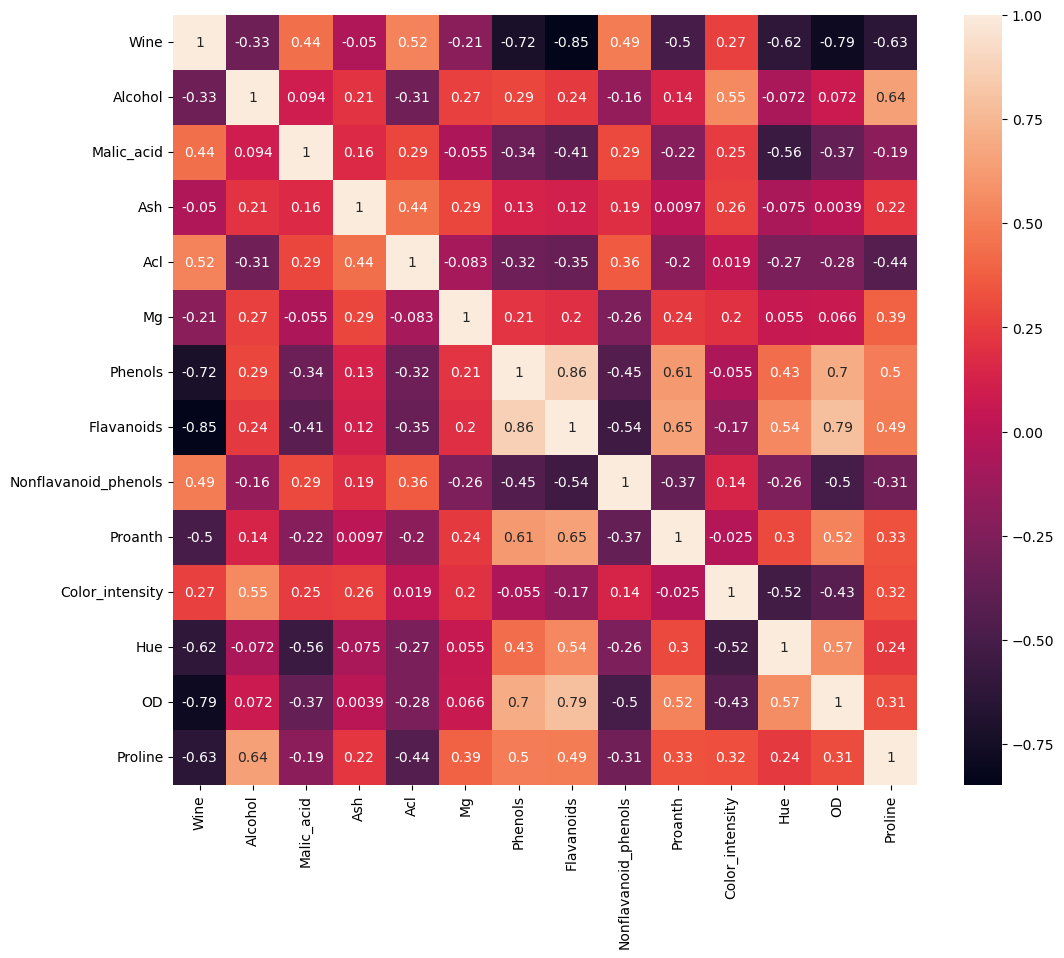

In [5]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 12 , 10 ) )
sns.heatmap(df.corr(method='pearson'), annot = True)

#### Feature selection using chi-squared test

In [6]:
from sklearn.feature_selection import chi2

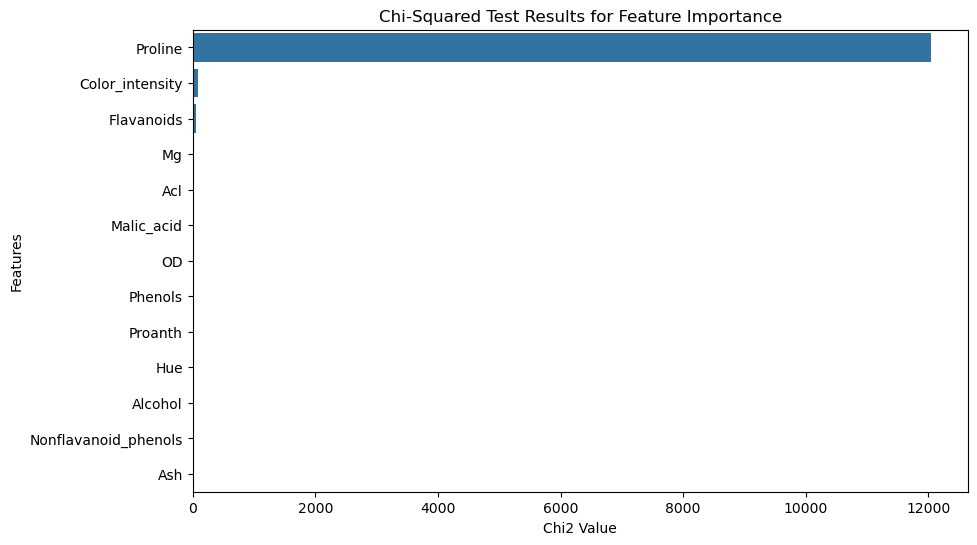

                 Feature    Chi2 Value       P-Value
12               Proline  12039.108408  0.000000e+00
9        Color_intensity     88.252633  6.857790e-20
6             Flavanoids     51.066119  8.149542e-12
4                     Mg     30.106936  2.899759e-07
3                    Acl     26.339265  1.907661e-06
1             Malic_acid     22.719334  1.165626e-05
11                    OD     20.079368  4.363355e-05
5                Phenols     11.928761  2.568635e-03
8                Proanth      7.426008  2.440411e-02
10                   Hue      4.233363  1.204306e-01
0                Alcohol      4.115858  1.277182e-01
7   Nonflavanoid_phenols      1.473480  4.786718e-01
2                    Ash      0.580353  7.481313e-01


In [7]:
chi2_values, p_values = chi2(X_train, y_train)

chi2_results = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
}).sort_values(by='Chi2 Value', ascending=False)

# Step 5: Visualize the results with a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2 Value', y='Feature', data=chi2_results)
plt.title('Chi-Squared Test Results for Feature Importance')
plt.xlabel('Chi2 Value')
plt.ylabel('Features')
plt.show()

# Optional: Display the chi-squared and p-values
print(chi2_results)

##### Fairer Comparison of Variance With Feature Normalization
Often, it is not fair to compare the variance of a feature to another. The reason is that as the values in the distribution get bigger, the variance grows exponentially. In other words, the variances will not be on the same scale.

In [8]:
X_train.describe()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_intensity,Hue,OD,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.979085,2.373521,2.360845,19.473239,100.443662,2.289085,2.002113,0.368028,1.608028,5.057606,0.956380,2.592817,734.894366
std,0.820116,1.143934,0.279217,3.454792,14.650793,0.637715,1.004170,0.128269,0.583656,2.330917,0.234101,0.722141,302.323595
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.615000,2.210000,17.200000,88.250000,1.725000,1.125000,0.270000,1.250000,3.220000,0.782500,1.837500,502.500000
50%,13.010000,1.875000,2.360000,19.200000,98.000000,2.310000,2.075000,0.340000,1.555000,4.600000,0.965000,2.775000,660.000000
75%,13.677500,3.135000,2.540000,21.500000,107.000000,2.800000,2.842500,0.470000,1.967500,6.122500,1.120000,3.170000,932.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000


#### Feature selection using correlation

<Axes: >

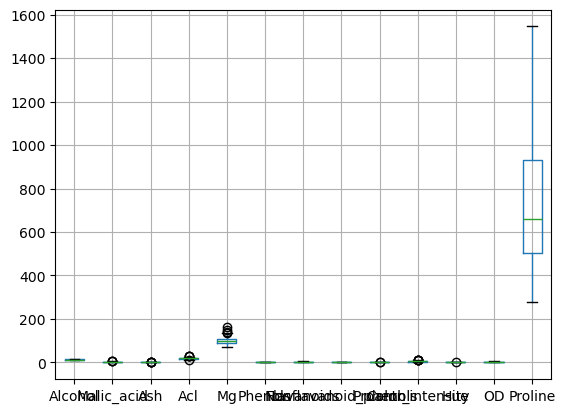

In [9]:
X_train.boxplot()

The above features all have different medians, quartiles, and ranges — completely different distributions. We cannot compare these features to each other.

One method we can use is scale all features using the Robust Scaler which is not highly affected by outliers:

In [10]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()
# scale all features
scaled = transformer.fit_transform(X_train)
# covert scaled array to Pandas DataFrame
X_train_scaled = pd.DataFrame(scaled, columns=X_train.columns, index=X_train.index)

This method ensures that all variances are on the same scale:

In [11]:
X_train_scaled.var()

Alcohol                 0.371797
Malic_acid              0.566389
Ash                     0.715908
Acl                     0.645516
Mg                      0.610548
Phenols                 0.351914
Flavanoids              0.341838
Nonflavanoid_phenols    0.411321
Proanth                 0.661713
Color_intensity         0.644925
Hue                     0.481126
OD                      0.293703
Proline                 0.493745
dtype: float64

In [12]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.35)
# Learn variances from X_train_scaled
_ = selector.fit(X_train_scaled)
# Get a mask (or integer index if indices=True is set) of the features selected
mask = selector.get_support()
print(mask)
# get the subset of features selected
X_train_transformed = X_train_scaled.loc[:,mask]
X_train_transformed

[ True  True  True  True  True False False  True  True  True  True False
  True]


,Alcohol,Malic_acid,Ash,Acl,Mg,Nonflavanoid_phenols,Proanth,Color_intensity,Hue,Proline
158,0.988848,-0.128289,1.030303,1.348837,0.000000,0.95,1.595819,2.894057,-1.170370,0.000000
137,-0.356877,2.391447,0.848485,1.348837,-0.106667,1.45,-0.634146,0.137812,-0.429630,-0.337013
98,-0.475836,-0.529605,-0.787879,-0.162791,-0.533333,-0.50,0.550523,-0.034453,0.222222,0.000000
159,0.349442,-0.134868,0.848485,0.767442,-0.480000,0.90,1.024390,2.463394,-1.170370,-0.092969
38,0.044610,-0.246711,-0.787879,-0.860465,0.000000,-0.30,-0.257840,-0.310078,0.637037,0.836723
...,...,...,...,...,...,...,...,...,...,...
71,0.631970,-0.240132,0.939394,1.348837,-0.640000,-0.65,0.439024,-0.420327,1.170370,-0.581058
106,-0.565056,-0.095395,-0.727273,-0.046512,-0.960000,0.15,0.104530,-0.413437,0.103704,-0.348635
14,1.018587,-0.003289,0.060606,-1.674419,0.213333,-0.25,1.958188,0.999139,0.696296,2.061592
92,-0.237918,-0.226974,-0.303030,0.348837,-0.960000,1.20,0.090592,-0.534022,-0.014815,-0.383498


#### 

#### Feature selection using feature importance

Feature ranking:
1. feature 12 - Proline (0.216120)
2. feature 11 - OD (0.191357)
3. feature 6 - Flavanoids (0.161096)
4. feature 9 - Color_intensity (0.157190)
5. feature 0 - Alcohol (0.098776)
6. feature 10 - Hue (0.051089)
7. feature 4 - Mg (0.028590)
8. feature 5 - Phenols (0.026197)
9. feature 1 - Malic_acid (0.023425)
10. feature 3 - Acl (0.013834)
11. feature 2 - Ash (0.011700)
12. feature 8 - Proanth (0.010689)
13. feature 7 - Nonflavanoid_phenols (0.009936)


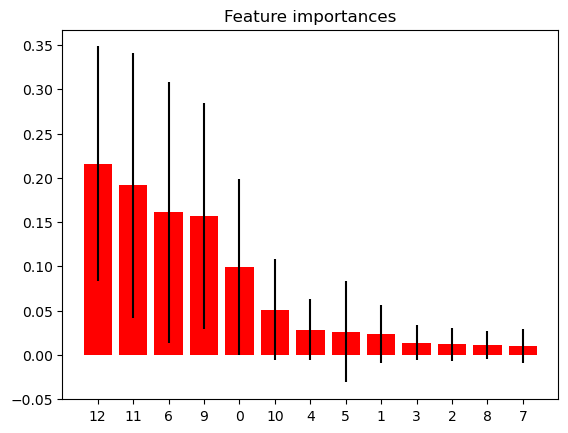

In [13]:
# Feature Importance 1
# Use ensemble method: The goal of ensemble methods is to combine the 
# predictions of several base estimators built with a given learning algorithm 
# in order to improve generalizability / robustness over a single estimator.
# http://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import ExtraTreesClassifier
# Build an estimator (forest of trees) and compute the feature importances
# n_estimators = number of trees in forest
estimator = ExtraTreesClassifier(n_estimators=100, max_features=13, random_state=0)
estimator.fit(X_train,y_train)
# Lets get the feature importances. Features with high importance score higher.
importances = estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in estimator.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [14]:
# Feature Importance 2
from sklearn.feature_selection import RFE
estimator = ExtraTreesClassifier(n_estimators=100, random_state=0)
# keep the 5 most informative features
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
print(list(selector.support_))
print(list(selector.ranking_))

[True, False, False, False, False, False, True, False, False, True, False, True, True]
[1, 3, 9, 5, 6, 4, 1, 8, 7, 1, 2, 1, 1]


#### Feature selection using Forward selection/Backward elimination

In [15]:
# Example 1
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
sfs = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10,
           n_jobs=-1)
           
sfs = sfs.fit(X_train_scaled, y_train)

print('\nSequential Forward Selection (k=5):')
print('Selected features:',sfs.k_feature_idx_)
print('Prediction score:',sfs.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    6.0s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.2s finished

[2025-10-21 10:37:55] Features: 1/5 -- score: 0.7809523809523811[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2025-10-21 10:37:55] Features: 2/5 -- score: 0.9223809523809525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2025-10-21 10:37:55] Features: 3/5 -- score: 0.9642857142857142[Parallel(n_jobs=-1)]: Using backend Lok


Sequential Forward Selection (k=5):
Selected features: (4, 5, 6, 9, 11)
Prediction score: 0.9785714285714286


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2025-10-21 10:37:56] Features: 5/5 -- score: 0.9785714285714286

In [16]:
# Example 2
# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=5, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=10,
          n_jobs=-1)

sbs = sbs.fit(X_train_scaled, y_train)

print('\nSequential Backward Selection (k=5):')
print('Selected features:',sbs.k_feature_idx_)
print('Prediction (CV) score:',sbs.k_score_)


Sequential Backward Selection (k=5):
Selected features: (0, 8, 9, 10, 12)
Prediction (CV) score: 0.9647619047619047


In [17]:
# Example 3
print(pd.DataFrame.from_dict(sbs.get_metric_dict()).T)

                                   feature_idx  \
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
11        (0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12)   
10            (0, 1, 2, 3, 5, 6, 8, 9, 10, 12)   
9                (0, 2, 3, 5, 6, 8, 9, 10, 12)   
8                   (0, 2, 3, 5, 8, 9, 10, 12)   
7                      (0, 3, 5, 8, 9, 10, 12)   
6                         (0, 3, 8, 9, 10, 12)   
5                            (0, 8, 9, 10, 12)   

                                            cv_scores avg_score  \
13  [1.0, 0.8666666666666667, 0.8571428571428571, ...  0.936667   
12  [1.0, 1.0, 1.0, 0.9285714285714286, 1.0, 1.0, ...  0.964286   
11  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714...  0.978571   
10  [0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, ...  0.979048   
9   [1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 1.0, ...  0.978571   
8   [1.0, 1.0, 1.0, 0.9285714285714286, 0.92857142...  0.978571   
7   [0.9333333333333333, 1.0, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2025-10-21 10:37:58] Features: 1/5 -- score: 0.7809523809523811[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2025-10-21 10:37:58] Features: 2/5 -- score: 0.9223809523809525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2025-10-21 10:37:58] Features: 3/5 -- score: 0.9642857142857142[Parallel(n_jobs=-1)]: Using backend Lok

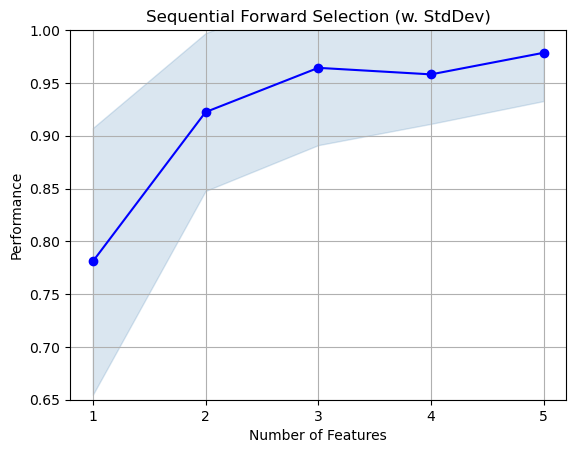

In [18]:
# Example 4
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs = SFS(knn, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=10,
          n_jobs=-1)

sfs = sfs.fit(X_train_scaled, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.65, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

best combination (ACC: 0.979): (4, 5, 6, 9, 11)

all subsets:
 {1: {'feature_idx': (6,), 'cv_scores': array([0.8       , 0.86666667, 0.78571429, 0.78571429, 0.71428571,
       0.92857143, 0.5       , 0.85714286, 0.92857143, 0.64285714]), 'avg_score': 0.7809523809523811, 'feature_names': ('Flavanoids',)}, 2: {'feature_idx': (6, 9), 'cv_scores': array([0.93333333, 0.93333333, 0.92857143, 0.92857143, 0.78571429,
       1.        , 1.        , 0.92857143, 1.        , 0.78571429]), 'avg_score': 0.9223809523809525, 'feature_names': ('Flavanoids', 'Color_intensity')}, 3: {'feature_idx': (4, 6, 9), 'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.78571429,
       1.        , 1.        , 1.        , 1.        , 0.85714286]), 'avg_score': 0.9642857142857142, 'feature_names': ('Mg', 'Flavanoids', 'Color_intensity')}, 4: {'feature_idx': (4, 6, 9, 11), 'cv_scores': array([0.93333333, 0.93333333, 1.        , 1.        , 0.85714286,
       0.92857143, 1.        , 1.        , 1.  

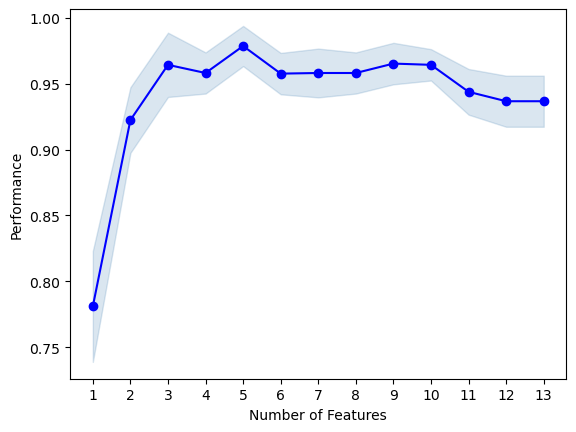

In [19]:
# Example 5
knn = KNeighborsClassifier(n_neighbors=4)

sfs_range = SFS(estimator=knn, 
           k_features=(2, 13),
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=10,
           n_jobs=-1)

sfs_range = sfs_range.fit(X_train_scaled, y_train)

print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))
print('all subsets:\n', sfs_range.subsets_)
plot_sfs(sfs_range.get_metric_dict(), kind='std_err');
plt.show()

In [20]:
# export the selected set of features in a new dataset
X_train_scaled_selected = sfs_range.transform(X_train_scaled)
X_train_scaled_selected

array([[ 0.        ,  0.45581395, -0.44541485,  2.89405685, -0.61163227],
       [-0.10666667, -0.48372093, -0.8588064 ,  0.13781223, -0.81425891],
       [-0.53333333,  1.1255814 ,  0.97525473, -0.03445306, -0.00375235],
       [-0.48      ,  0.26976744, -0.56768559,  2.46339363, -0.7467167 ],
       [ 0.        ,  0.08372093,  0.32896652, -0.31007752, -0.06378987],
       [-0.32      ,  0.04651163, -0.02037846, -0.6546081 ,  0.18386492],
       [ 0.05333333, -0.10232558, -0.07860262, -0.68217054,  0.28893058],
       [ 0.64      ,  0.20465116, -0.45123726, -0.49267873, -0.63414634],
       [-0.32      , -0.28837209, -0.74235808, -0.06890612, -0.54409006],
       [ 0.16      ,  0.45581395,  0.6783115 ,  0.37209302,  0.29643527],
       [-0.05333333, -0.0744186 ,  0.05531295, -0.44788975,  0.13883677],
       [ 0.21333333, -0.10232558,  0.03202329, -0.86821705,  0.25891182],
       [ 0.26666667, -0.77209302, -0.87045124,  1.03359173, -0.91932458],
       [-0.21333333,  0.13023256,  0.5

#### Feature Extraction

PCA explained variance ratio (first 10 components): [0.31661791 0.2015462  0.1371968  0.08227032 0.07139436 0.05400057
 0.04001648 0.02488089 0.02157418 0.01902333]


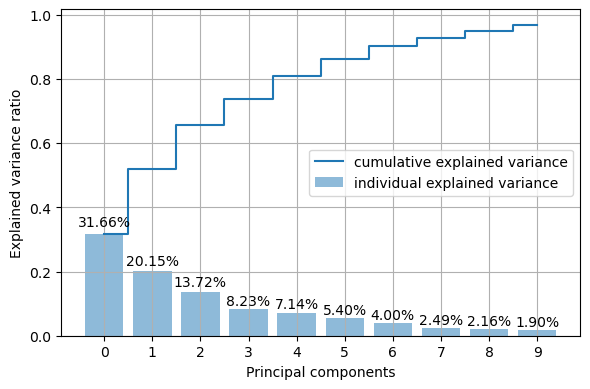

In [21]:
def print_2d_scatter_plot(features, target, title, n_components):
    newDf=pd.DataFrame(features, columns=['Feature '+str(i) for i in range(features.shape[1])])
    newDf['target']=target
    sns.scatterplot(data=newDf, x='Feature 0', y='Feature 1', hue='target').set(title=title+', '+str(n_components)+' components')
    plt.show() 
    
def print_variance_explained_plot(obj, n_components):
    cum_var_exp = np.cumsum(obj.explained_variance_ratio_)
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(range(n_components), obj.explained_variance_ratio_, alpha=0.5, align='center',
                label='individual explained variance')
    # show percentage of explained variance on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.05*height, '%.2f%%' % (height*100), 
                ha='center', va='bottom')
    plt.step(range(n_components), cum_var_exp, where='mid',
                 label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks( range(n_components) )
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# PCA on the wine dataset
from sklearn.decomposition import PCA
components = 10
pca = PCA(n_components=components)
# train PCA
pca.fit(X_train_scaled)
# Percentage of variance explained for each components
print('PCA explained variance ratio (first '+str(components)+' components): %s'
      % str(pca.explained_variance_ratio_))
print_variance_explained_plot(pca,components)

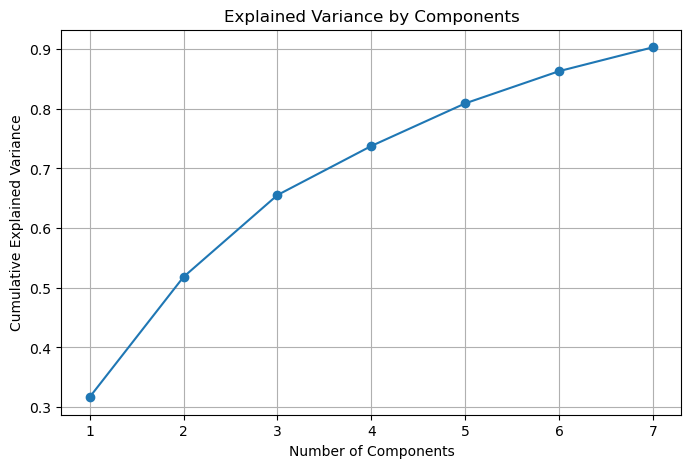

In [22]:
# As can be seen from the figure above, 7 principal components (new features created by PCA) cumulatively explain ~90% of the variance 
pca = PCA(n_components=7)
pca.fit(X_train_scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

In [23]:
# new extracted feature set with the new 7 features
X_train_scaled_pca = pca.transform(X_train_scaled)
X_train_scaled_pca

array([[-8.91385624e-01,  2.79242855e+00,  1.80710858e-01,
         1.34748456e+00,  1.18851537e-01, -2.31014601e+00,
         8.29245159e-02],
       [-2.76946904e+00,  4.91648252e-01,  9.59204084e-01,
         3.81752404e-01,  4.39228773e-03,  1.02668491e+00,
         7.28717089e-01],
       [ 1.41573097e+00, -9.47951405e-01, -2.66524426e-02,
         7.49579940e-01, -1.56491557e-01, -6.91434089e-01,
        -6.53895781e-01],
       [-1.14272841e+00,  1.92521190e+00, -1.45231060e-01,
         1.14383452e+00, -1.77194037e-01, -2.02862139e+00,
        -1.75462975e-02],
       [ 1.19138921e+00, -7.72663745e-01, -8.18308488e-01,
        -5.20512201e-01, -4.80502972e-01,  2.02146550e-01,
        -3.46565335e-02],
       [ 3.05461553e-01, -1.72071273e+00, -1.48071240e-01,
         6.96136837e-01,  6.09525610e-01, -6.75786448e-01,
         1.16306268e-01],
       [ 6.85304527e-01, -1.41853423e+00,  2.08977492e-01,
        -5.87779491e-01, -9.48854868e-02, -1.96699195e-01,
        -7.1020756

#### Feature Extraction example using PCA, SVD and LDA

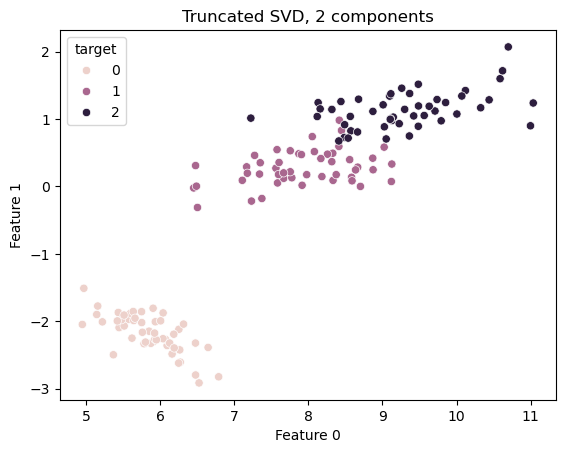

TruncatedSVD explained variance ratio (first two components): [0.52875361 0.44845576]


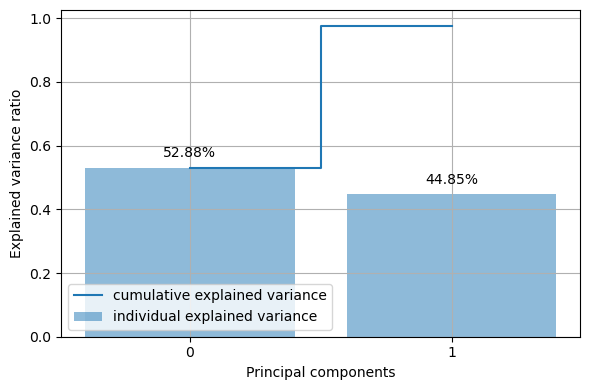

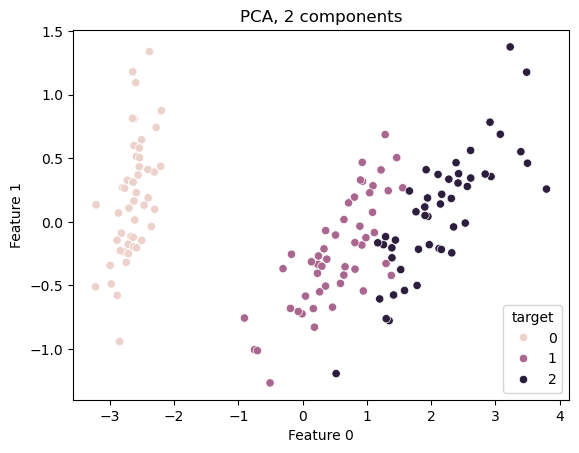

PCA explained variance ratio (first two components): [0.92461872 0.05306648]


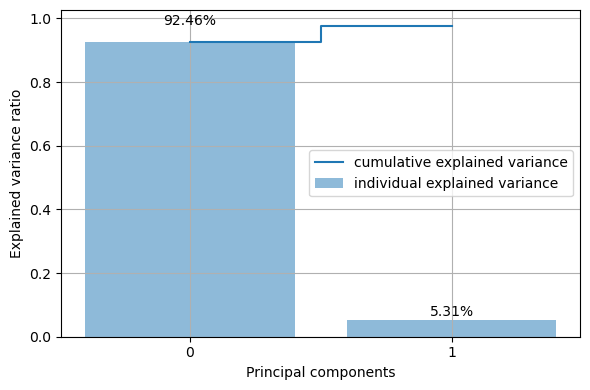

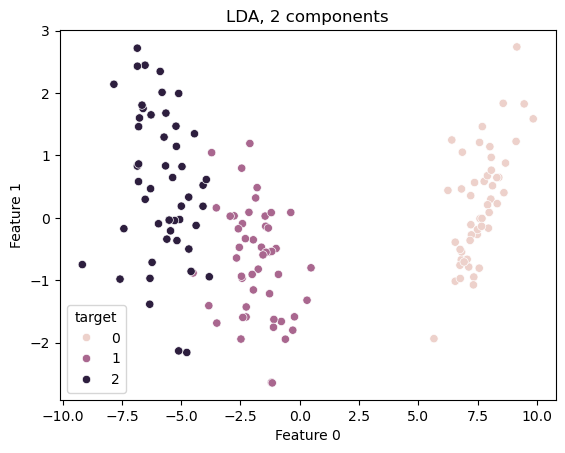

LDA explained variance ratio (first two components): [0.9912126 0.0087874]


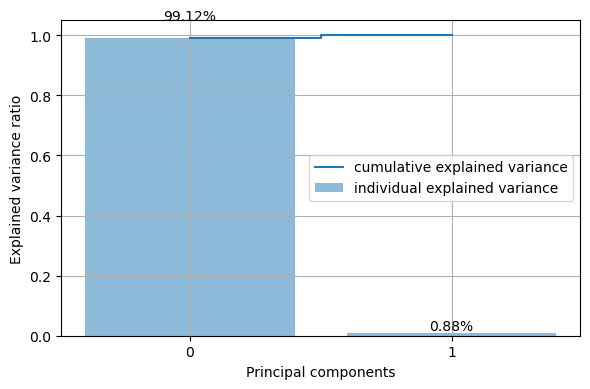

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_target = iris.target
num_of_classes = len(set(iris_target))

# Truncated SVD
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(2)
iris_tsvd = tsvd.fit_transform(iris_data)
print_2d_scatter_plot(iris_tsvd, iris_target, 'Truncated SVD', 2)
# Percentage of variance explained for each components
print('TruncatedSVD explained variance ratio (first two components): %s'
      % str(tsvd.explained_variance_ratio_))
print_variance_explained_plot(tsvd,2)

# PCA (no need to scale features because all features on the same scale)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)
print_2d_scatter_plot(iris_pca, iris_target, 'PCA', 2)
# Percentage of variance explained for each components
print('PCA explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print_variance_explained_plot(pca,2)

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit(iris_data, iris_target).transform(iris_data)
print_2d_scatter_plot(iris_lda, iris_target, 'LDA', 2)
# Percentage of variance explained for each components
print('LDA explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))
print_variance_explained_plot(lda,2)